In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

Load the Dataset

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

Here we see there are 50000 training images and 1000 test images

In [4]:
y_train.shape

(50000, 1)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array

In [6]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
y_test = y_test.reshape(-1,)

In [8]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

Plotting some images

In [9]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

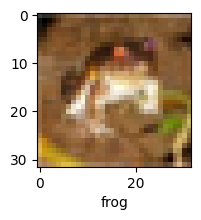

In [10]:
plot_sample(X_train, y_train, 0)

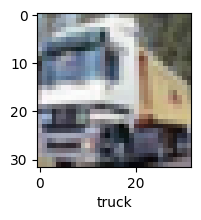

In [11]:
plot_sample(X_train, y_train, 1)

# Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

In [12]:
X_train = X_train / 255.0
X_test = X_test / 255.0

# Simple ANN for image classification

SoftMax - Normalize the value between 0 and 1
ReLU - Remove nonlinearity
Sigmoid 

In [13]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.3091 - loss: 1.9287
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4222 - loss: 1.6389
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4531 - loss: 1.5466
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4761 - loss: 1.4889
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4952 - loss: 1.4349


**You can see that at the end of 5 epochs, accuracy is at around 49%**

In [14]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.45      0.61      0.52      1000
           1       0.32      0.87      0.47      1000
           2       0.42      0.28      0.33      1000
           3       0.42      0.19      0.26      1000
           4       0.57      0.21      0.31      1000
           5       0.40      0.30      0.34      1000
           6       0.50      0.50      0.50      1000
           7       0.70      0.33      0.45      1000
           8       0.61      0.49      0.54      1000
           9       0.33      0.47      0.39      1000

    accuracy                           0.43     10000
   macro avg       0.47      0.43      0.41     10000
weighted avg       0.47      0.43      0.41     10000



# Now we are building CNN to train out images

In [15]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.3895 - loss: 1.6727
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6128 - loss: 1.1131
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6680 - loss: 0.9518
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7009 - loss: 0.8592
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7302 - loss: 0.7831
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7503 - loss: 0.7196
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7695 - loss: 0.6678
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7849 - loss: 0.6166
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7989 - loss: 0.5764
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8120 - loss: 0.5388


**With CNN, at the end 5 epochs, accuracy was at around 70% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features**

In [18]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7006 - loss: 0.9238


[0.9437020421028137, 0.6976000070571899]

In [19]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[4.72659711e-03, 4.62179705e-05, 8.39444902e-03, 7.09473252e-01,
        1.37054175e-02, 2.17604876e-01, 1.14221079e-02, 8.14915111e-05,
        3.42718549e-02, 2.73649290e-04],
       [1.36482076e-05, 1.75304560e-03, 3.25850351e-07, 4.86650116e-08,
        9.76917214e-10, 1.28650668e-09, 4.05994349e-09, 5.86236115e-10,
        9.98221099e-01, 1.17239924e-05],
       [1.23390546e-02, 1.33885331e-02, 8.09939869e-04, 6.47496316e-04,
        1.12514654e-05, 1.58117637e-05, 2.45432428e-04, 7.97513290e-04,
        9.71222341e-01, 5.22677437e-04],
       [1.22848772e-01, 4.84692166e-03, 6.98154792e-04, 4.63853683e-03,
        4.43659927e-04, 4.20968136e-05, 3.46297384e-05, 1.62950993e-04,
        8.66142988e-01, 1.41265147e-04],
       [4.07816287e-06, 1.11677045e-05, 1.67410932e-02, 6.24569179e-03,
        2.02049077e-01, 4.58127679e-03, 7.70114064e-01, 2.84903052e-07,
        2.53152510e-04, 5.65797933e-08]], dtype=float32)

here 12 is the maximum element so for that index is 1 

In [20]:
np.argmax([5,12,1,2])

1

In [21]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:10]

[3, 8, 8, 8, 6, 6, 1, 6, 3, 1]

In [22]:
y_test[:10]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1], dtype=uint8)

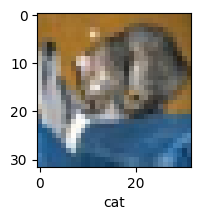

In [23]:
plot_sample(X_test, y_test,0)

In [24]:
classes[y_classes[0]]

'cat'

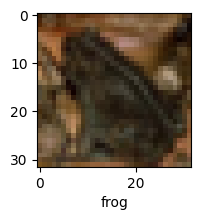

In [25]:
plot_sample(X_test, y_test,30)

In [26]:
classes[y_classes[30]]

'frog'